# Sharp Ratio & Frontier

In [1]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from datetime import date

%matplotlib inline

ds_yahoo = 'yahoo'

last_year = datetime.datetime.now().year - 1
#start = datetime.datetime.now().replace(year=last_year)
start = date(date.today().year, 1, 1)
end = datetime.datetime.now()

## Portfolio Atual

### Pegando os dados na API do Yahoo

In [2]:
tickers = ['USIM5.SA','TIET11.SA','ENBR3.SA','ITUB4.SA','ABCB4.SA','LEVE3.SA','ABEV3.SA','FLRY3.SA',
           'ODPV3.SA','PSSA3.SA','WHRL3.SA','ROMI3.SA',
           'JNJ','AMZN','M','LB','ROST','V','GOOGL','MSFT','IHI','VGT','NOBL','ARKW']

usim = web.DataReader(tickers[0], ds_yahoo, start, end)
tiet = web.DataReader(tickers[1], ds_yahoo, start, end)
enbr = web.DataReader(tickers[2], ds_yahoo, start, end)
itub = web.DataReader(tickers[3], ds_yahoo, start, end)
abc = web.DataReader(tickers[4], ds_yahoo, start, end)
leve = web.DataReader(tickers[5], ds_yahoo, start, end)
abev = web.DataReader(tickers[6], ds_yahoo, start, end)
flry = web.DataReader(tickers[7], ds_yahoo, start, end)
odpv = web.DataReader(tickers[8], ds_yahoo, start, end)
pssa = web.DataReader(tickers[9], ds_yahoo, start, end)
whrl = web.DataReader(tickers[10], ds_yahoo, start, end)
romi = web.DataReader(tickers[11], ds_yahoo, start, end)
jnj = web.DataReader(tickers[12], ds_yahoo, start, end)
amzn = web.DataReader(tickers[13], ds_yahoo, start, end)
m = web.DataReader(tickers[14], ds_yahoo, start, end)
lb = web.DataReader(tickers[15], ds_yahoo, start, end)
rost = web.DataReader(tickers[16], ds_yahoo, start, end)
v = web.DataReader(tickers[17], ds_yahoo, start, end)
googl = web.DataReader(tickers[18], ds_yahoo, start, end)
msft = web.DataReader(tickers[19], ds_yahoo, start, end)
ihi = web.DataReader(tickers[20], ds_yahoo, start, end)
vgt = web.DataReader(tickers[21], ds_yahoo, start, end)
nobl = web.DataReader(tickers[22], ds_yahoo, start, end)
arkw = web.DataReader(tickers[23], ds_yahoo, start, end)

## Normalizando o retorno diário de cada ativo do portfólio

In [3]:
for acao_df in (usim,tiet,enbr,itub,abc,leve,abev,flry,odpv,pssa,whrl,romi,jnj,amzn,m,lb,rost,v,googl,msft,ihi,vgt,nobl,arkw):
    acao_df['Retorno Normalizado'] = acao_df['Adj Close'] / acao_df.iloc[0]['Adj Close']

## Alocando cada ativo com um peso específico

In [4]:
pesos = [.319, .664, .255, .839, .127, .561, .403, .664, .095, 1.350, .509, 
         .015, .310, .282, .079, .107, .145, .387, .144, .399, .395, 1.010, 
         .666, .274]

for acao_df, alocacao in zip((usim,tiet,enbr,itub,abc,leve,abev,flry,odpv,pssa,whrl,romi,jnj,amzn,m,lb,rost,v,googl,msft,ihi,vgt,nobl,arkw), pesos):
    acao_df['Alocacao'] = acao_df['Retorno Normalizado'] * alocacao

## Posição de cada ativo no portfólio

In [5]:
for acao_df in usim,tiet,enbr,itub,abc,leve,abev,flry,odpv,pssa,whrl,romi,jnj,amzn,m,lb,rost,v,googl,msft,ihi,vgt,nobl,arkw:
    acao_df['Posicao'] = acao_df['Alocacao'] * 10000

In [6]:
todas_posicoes = usim['Posicao'],tiet['Posicao'],enbr['Posicao'],itub['Posicao'],abc['Posicao'],leve['Posicao'],abev['Posicao'],flry['Posicao'],odpv['Posicao'],pssa['Posicao'],whrl['Posicao'], romi['Posicao'],jnj['Posicao'],amzn['Posicao'],m['Posicao'],lb['Posicao'],rost['Posicao'],v['Posicao'],googl['Posicao'],msft['Posicao'],ihi['Posicao'],vgt['Posicao'],nobl['Posicao'],arkw['Posicao']

# DF que terá colunas adicionadas como Total e Retorno Diário
portfolio_posicao = pd.concat(todas_posicoes, axis=1)

# DF que terá apenas as ações com o Adj Close column
portfolio_acoes = pd.concat(todas_posicoes, axis=1)

In [7]:
portfolio_posicao.columns = ['usim','tiet','enbr','itub','abc','leve','abev','flry','odpv','pssa','whrl','romi','jnj','amzn','m','lb','rost','v','googl','msft','ihi','vgt','nobl','arkw']
portfolio_acoes.columns = ['usim','tiet','enbr','itub','abc','leve','abev','flry','odpv','pssa','whrl','romi','jnj','amzn','m','lb','rost','v','googl','msft','ihi','vgt','nobl','arkw']

## Desempenho da carteira

In [8]:
portfolio_posicao['Total'] = portfolio_posicao.sum(axis=1)

In [9]:
print('Investimento inicial:')
print(portfolio_posicao['Total'][0])
print('Investimento final:')
print(round(portfolio_posicao['Total'][-1], 2))

Investimento inicial:
99990.0
Investimento final:
69360.06


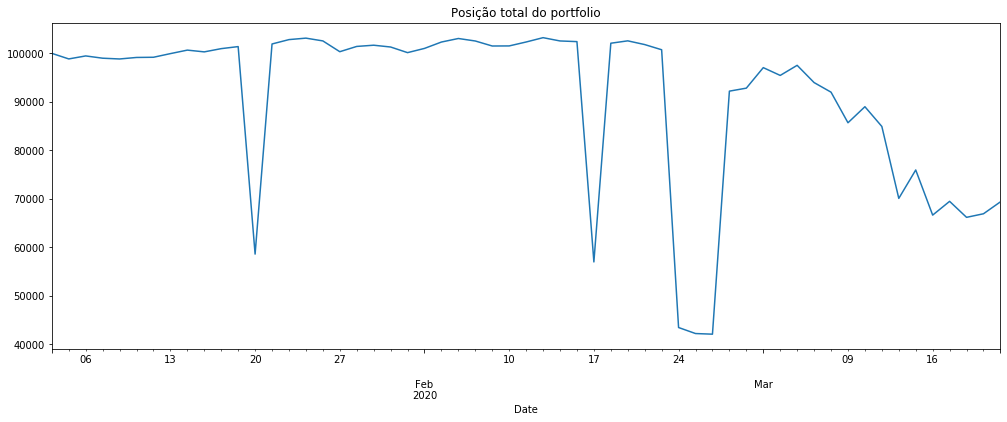

In [10]:
portfolio_posicao['Total'].plot(figsize=(17,6))
plt.title('Posição total do portfolio');

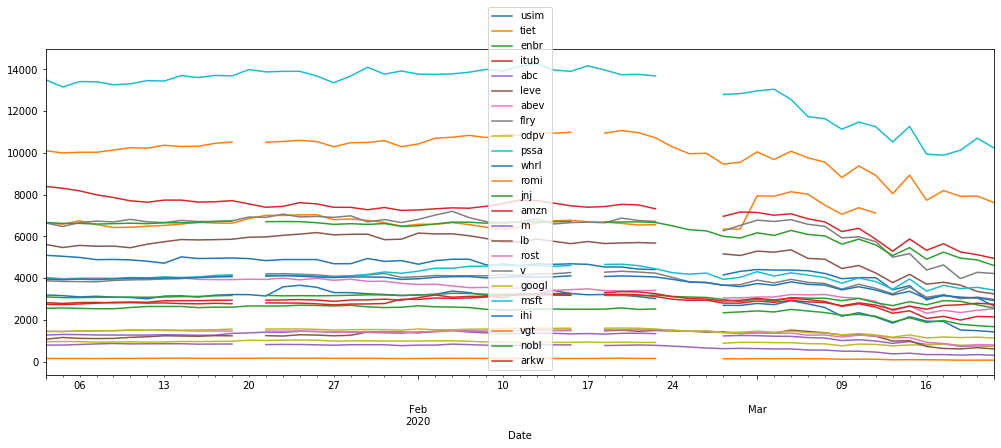

In [11]:
portfolio_acoes.plot(figsize=(17,6));

## Desempenho da Carteira Normalizada

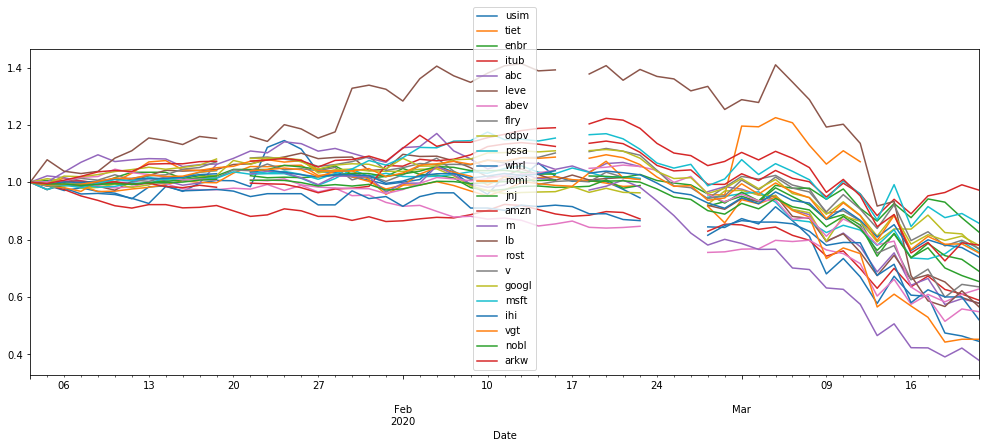

In [12]:
portfolio_normalizado = portfolio_acoes / portfolio_acoes.iloc[0]
portfolio_normalizado.plot(figsize=(17,6));

In [13]:
desempenho = (portfolio_acoes.iloc[-1] - portfolio_acoes.iloc[0]) / portfolio_acoes.iloc[0]
desempenho = round(desempenho * 100, 2)
desempenho.sort_values()

m       -62.05
usim    -55.46
romi    -54.76
whrl    -47.90
rost    -45.14
lb      -43.39
leve    -42.23
abc     -42.12
itub    -41.13
abev    -37.24
flry    -36.48
enbr    -34.60
nobl    -30.99
ihi     -26.02
vgt     -24.65
pssa    -24.29
odpv    -23.44
v       -23.06
tiet    -22.51
googl   -21.95
arkw    -21.92
jnj     -17.34
msft    -14.25
amzn     -2.74
dtype: float64

## Retorno diário da carteira

In [14]:
portfolio_posicao['Retorno Diario'] = portfolio_posicao['Total'].pct_change(1)

In [15]:
# Média de retorno diário
round_ret_medio_diario = round(portfolio_posicao['Retorno Diario'].mean() * 100, 2)
print('Essa carteira rende em média {}% diariamente'.format(round_ret_medio_diario))

Essa carteira rende em média 1.82% diariamente


In [16]:
# Desvio Padrão do retorno diário
portfolio_posicao['Retorno Diario'].std()

0.24679352208502944

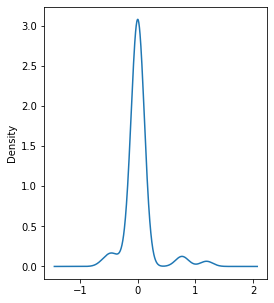

In [17]:
# Gráfico de densidade
portfolio_posicao['Retorno Diario'].plot(kind='kde', figsize=(4,5));

## Retorno Total da Carteira

In [18]:
retorno_total_acumulado = 100 * (portfolio_posicao['Total'][-1] / portfolio_posicao['Total'][0] - 1)
round_ret = round(retorno_total_acumulado, 3)
print('Essa carteira rendeu {} %'.format(round_ret))

Essa carteira rendeu -30.633 %


In [19]:
sharpe_ratio = (portfolio_posicao['Retorno Diario'].mean()) / portfolio_posicao['Retorno Diario'].std()
sharpe_ratio

0.07361513026388418

In [20]:
sharpe_ratio_ano = (245 ** 0.5) * sharpe_ratio
sharpe_ratio_ano

1.1522590480978294

## Retorno diário

In [21]:
retorno_diario = portfolio_acoes.pct_change(1)

## Gerando um único portfólio com posição atual

In [22]:
print(portfolio_acoes.columns)

# Gerando pesos aleatórios
print("Pesos Atuais")
print(pesos)

print("Rebalancear os pesos")
pesos = pesos / np.sum(pesos)
print(pesos)

# Retorno esperado
print("Retorno esperado")
ret_esp = np.sum( (retorno_diario.mean() * pesos) * 245 )
print(ret_esp)

# Volatilidade esperada
print("Volatilidade esperada")
vol_esp = np.sqrt( np.dot( pesos.T, np.dot( retorno_diario.cov() * 245, pesos ) ) )
print(vol_esp)

# Taxa de Sharpe
print("Sharpe Ratio")
sharpe = (ret_esp - 0.065) / vol_esp
print(sharpe)


Index(['usim', 'tiet', 'enbr', 'itub', 'abc', 'leve', 'abev', 'flry', 'odpv',
       'pssa', 'whrl', 'romi', 'jnj', 'amzn', 'm', 'lb', 'rost', 'v', 'googl',
       'msft', 'ihi', 'vgt', 'nobl', 'arkw'],
      dtype='object')
Pesos Atuais
[0.319, 0.664, 0.255, 0.839, 0.127, 0.561, 0.403, 0.664, 0.095, 1.35, 0.509, 0.015, 0.31, 0.282, 0.079, 0.107, 0.145, 0.387, 0.144, 0.399, 0.395, 1.01, 0.666, 0.274]
Rebalancear os pesos
[0.03190319 0.06640664 0.02550255 0.08390839 0.01270127 0.05610561
 0.04030403 0.06640664 0.00950095 0.1350135  0.05090509 0.00150015
 0.0310031  0.02820282 0.00790079 0.01070107 0.01450145 0.03870387
 0.01440144 0.03990399 0.03950395 0.1010101  0.06660666 0.02740274]
Retorno esperado
-1.4678575336393997
Volatilidade esperada
0.48047567404832947
Sharpe Ratio
-3.1902916556088012


## Gerando milhares de portfólios

In [23]:
num_portfolios = 1000
pesos_arr = np.zeros((num_portfolios, len(portfolio_acoes.columns)))
ret_esp_arr = np.zeros(num_portfolios)
vol_esp_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

for ind in range(num_portfolios):

    # Pesos aleatórios
    pesos = np.array(np.random.random(len(tickers)))
    pesos = pesos / np.sum(pesos)
    pesos_arr[ind,:] = pesos

    # Retorno esperado
    ret_esp_arr[ind] = np.sum( (retorno_diario.mean() * pesos) * 245 )

    # Volatilidade esperada
    vol_esp_arr[ind] = np.sqrt( np.dot( pesos.T, np.dot( retorno_diario.cov() * 245, pesos ) ) )

    # Taxa de Sharpe
    sharpe_arr[ind] = (ret_esp_arr[ind] - 0.065) / vol_esp_arr[ind]

pesos_arr[sharpe_arr.argmax(),:]

array([0.00421298, 0.07875704, 0.00124182, 0.00908765, 0.04318443,
       0.05785293, 0.03579601, 0.00848174, 0.07230802, 0.0237193 ,
       0.09086603, 0.01093746, 0.07323482, 0.0896091 , 0.01731366,
       0.02506918, 0.00019464, 0.05925033, 0.06573382, 0.06125025,
       0.002809  , 0.04141478, 0.03343632, 0.0942387 ])

In [24]:
sharpe_arr.max()

-2.7547788985203865

In [25]:
sharpe_arr.argmax()

451

In [26]:
pesos_arr[sharpe_arr.argmax(),:]

array([0.00421298, 0.07875704, 0.00124182, 0.00908765, 0.04318443,
       0.05785293, 0.03579601, 0.00848174, 0.07230802, 0.0237193 ,
       0.09086603, 0.01093746, 0.07323482, 0.0896091 , 0.01731366,
       0.02506918, 0.00019464, 0.05925033, 0.06573382, 0.06125025,
       0.002809  , 0.04141478, 0.03343632, 0.0942387 ])